## 数据探索

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

### 箱型图

                销量
count   200.000000
mean   2755.214700
std     751.029772
min      22.000000
25%    2451.975000
50%    2655.850000
75%    3026.125000
max    9106.440000
201


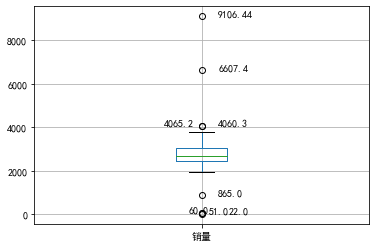

In [16]:
catering_sale = './data/catering_sale.xls'
data = pd.read_excel(catering_sale, index_col=u'日期')
print(data.describe())
print(len(data))

plt.figure()
# 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False
# 画箱线图，直接使用DataFrame的方法
p = data.boxplot(return_type='dict')
#  'fliers'即为异常值的标签
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
# 从小到大排序，该方法直接改变原对象
y.sort()
'''
用annotate添加注释
其中有些相近的点，注解会出现重叠，难以看清，需要一些技巧来控制
以下参数都是经过调试的，需要具体问题具体调试。
'''
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i] + 0.05 - 0.8 / (y[i] - y[i - 1]), y[i]))
    else:
        plt.annotate(y[i], xy=(x[i], y[i]), xytext=(x[i] + 0.08, y[i]))
plt.show()

### 直方图

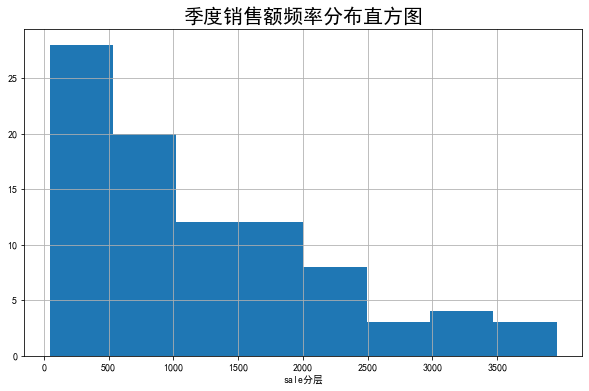

In [18]:
catering_fish_congee = './data/catering_fish_congee.xls'
data = pd.read_excel(catering_fish_congee, names=['date', 'sale'])
d = 500  # 设置组距
num_bins = round((max(data['sale']) - min(data['sale'])) / d)  # 计算组数
plt.figure(figsize=(10, 6))  # 设置图框大小尺寸
plt.hist(data['sale'], num_bins)
plt.xticks(range(0, 4000, d))
plt.xlabel('sale分层')
plt.grid()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.title('季度销售额频率分布直方图', fontsize=20)
plt.show()

### 饼图

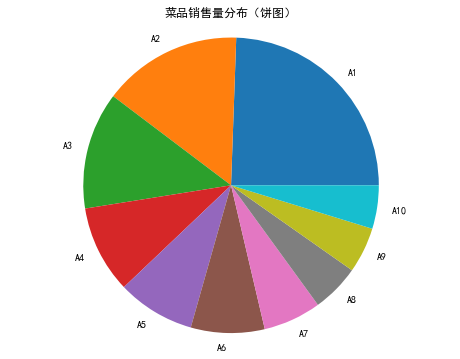

In [22]:
catering_dish_profit = './data/catering_dish_profit.xls'  # 餐饮数据
data = pd.read_excel(catering_dish_profit)  # 读取数据

# 绘制饼图
x = data['盈利']
labels = data['菜品名']
plt.figure(figsize=(8, 6))  # 设置画布大小
plt.pie(x, labels=labels)  # 绘制饼图
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.title('菜品销售量分布（饼图）')  # 设置标题
plt.axis('equal')
plt.show()

### 条形图

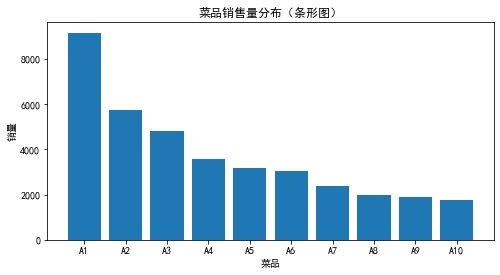

In [24]:
catering_dish_profit = './data/catering_dish_profit.xls'  # 餐饮数据
data = pd.read_excel(catering_dish_profit)  # 读取数据
x = data['菜品名']
y = data['盈利']
plt.figure(figsize=(8, 4))  # 设置画布大小
plt.bar(x, y)
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.xlabel('菜品')  # 设置x轴标题
plt.ylabel('销量')  # 设置y轴标题
plt.title('菜品销售量分布（条形图）')  # 设置标题
plt.show()  # 展示图片

### 折线图

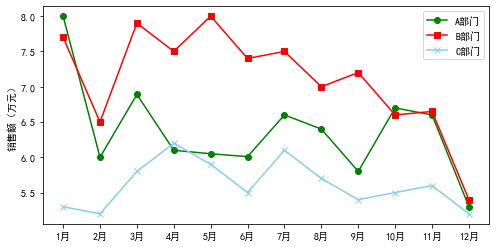

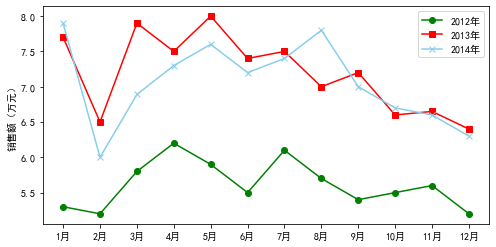

In [27]:
data = pd.read_excel("./data/dish_sale.xls")
plt.figure(figsize=(8, 4))
plt.plot(data['月份'], data['A部门'], color='green', label='A部门', marker='o')
plt.plot(data['月份'], data['B部门'], color='red', label='B部门', marker='s')
plt.plot(data['月份'], data['C部门'], color='skyblue', label='C部门', marker='x')
plt.legend()  # 显示图例
plt.ylabel('销售额（万元）')
plt.show()

#  B部门各年份之间销售金额的比较
data = pd.read_excel("./data/dish_sale_b.xls")
plt.figure(figsize=(8, 4))
plt.plot(data['月份'], data['2012年'], color='green', label='2012年', marker='o')
plt.plot(data['月份'], data['2013年'], color='red', label='2013年', marker='s')
plt.plot(data['月份'], data['2014年'], color='skyblue', label='2014年', marker='x')
plt.legend()  # 显示图例
plt.ylabel('销售额（万元）')
plt.show()

### 统计量

In [29]:
catering_sale = './data/catering_sale.xls'  # 餐饮数据
data = pd.read_excel(catering_sale, index_col = '日期')  # 读取数据，指定“日期”列为索引列
data = data[(data['销量'] > 400)&(data['销量'] < 5000)]  # 过滤异常数据
statistics = data.describe()  # 保存基本统计量

statistics.loc['range'] = statistics.loc['max']-statistics.loc['min']  # 极差
statistics.loc['var'] = statistics.loc['std']/statistics.loc['mean']  # 变异系数
statistics.loc['dis'] = statistics.loc['75%']-statistics.loc['25%']  # 四分位数间距

print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000


### 帕累托图

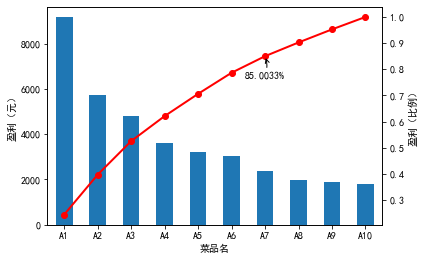

In [31]:
dish_profit = './data/catering_dish_profit.xls'  # 餐饮菜品盈利数据
data = pd.read_excel(dish_profit, index_col = '菜品名')
data = data['盈利'].copy()
data.sort_values(ascending = False)

import matplotlib.pyplot as plt  # 导入图像库
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.figure()
data.plot(kind='bar')
plt.ylabel('盈利（元）')
p = 1.0*data.cumsum()/data.sum()
p.plot(color = 'r', secondary_y = True, style = '-o',linewidth = 2)
plt.annotate(format(p[6], '.4%'), xy = (6, p[6]), xytext=(6*0.9, p[6]*0.9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))  # 添加注释，即85%处的标记。这里包括了指定箭头样式。
plt.ylabel('盈利（比例）')
plt.show()

### 相关系数

In [33]:
catering_sale = './data/catering_sale_all.xls'  # 餐饮数据，含有其他属性
data = pd.read_excel(catering_sale, index_col = '日期')  # 读取数据，指定“日期”列为索引列

print(data.corr())  # 相关系数矩阵，即给出了任意两款菜式之间的相关系数
print(data.corr()['百合酱蒸凤爪'])  # 只显示“百合酱蒸凤爪”与其他菜式的相关系数
# 计算“百合酱蒸凤爪”与“翡翠蒸香茜饺”的相关系数
print(data['百合酱蒸凤爪'].corr(data['翡翠蒸香茜饺']))

           百合酱蒸凤爪    翡翠蒸香茜饺   金银蒜汁蒸排骨     乐膳真味鸡     蜜汁焗餐包      生炒菜心    铁板酸菜豆腐  \
百合酱蒸凤爪   1.000000  0.009206  0.016799  0.455638  0.098085  0.308496  0.204898   
翡翠蒸香茜饺   0.009206  1.000000  0.304434 -0.012279  0.058745 -0.180446 -0.026908   
金银蒜汁蒸排骨  0.016799  0.304434  1.000000  0.035135  0.096218 -0.184290  0.187272   
乐膳真味鸡    0.455638 -0.012279  0.035135  1.000000  0.016006  0.325462  0.297692   
蜜汁焗餐包    0.098085  0.058745  0.096218  0.016006  1.000000  0.308454  0.502025   
生炒菜心     0.308496 -0.180446 -0.184290  0.325462  0.308454  1.000000  0.369787   
铁板酸菜豆腐   0.204898 -0.026908  0.187272  0.297692  0.502025  0.369787  1.000000   
香煎韭菜饺    0.127448  0.062344  0.121543 -0.068866  0.155428  0.038233  0.095543   
香煎罗卜糕   -0.090276  0.270276  0.077808 -0.030222  0.171005  0.049898  0.157958   
原汁原味菜心   0.428316  0.020462  0.029074  0.421878  0.527844  0.122988  0.567332   

            香煎韭菜饺     香煎罗卜糕    原汁原味菜心  
百合酱蒸凤爪   0.127448 -0.090276  0.428316  
翡翠蒸香茜饺   0.062344  0.270276 